# Actividad - Regresión Lineal

* **Nombre:** José Pablo Martínez Valdivia
* **Matrícula:** A01275676

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [2]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('presion.csv')
df.head(6)

Saving presion.csv to presion.csv


,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

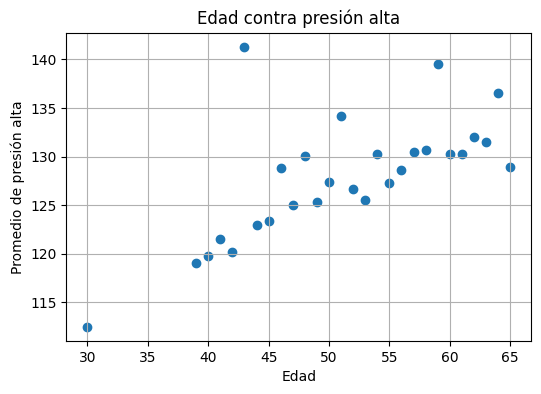

In [54]:
# Grafica la información de la edad y presión alta
Age = df['Age'].to_numpy()
AvgHighP = df['Average of ap_hi'].to_numpy()
AvgLowP = df['Average of ap_lo'].to_numpy()
fig = plt.figure(figsize=(6,4))
plt.scatter(Age, AvgHighP)

plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta')
plt.title('Edad contra presión alta')
plt.grid(True)


Genera una regresión líneal para obtener una aproximación de la ecuación
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [63]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
modelHP = LinearRegression(fit_intercept=True)
modelHP.fit(Age[:, np.newaxis], AvgHighP)
print("Modelo presión alta coeficiente (a): ", modelHP.coef_[0])
print("Modelo presion alta coeficeinte (b): ", modelHP.intercept_)

Modelo presión alta coeficiente (a):  0.47769702977669154
Modelo presion alta coeficeinte (b):  103.3969740964366


In [64]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
modelLP = LinearRegression(fit_intercept=True)
modelLP.fit(Age[:, np.newaxis], AvgLowP)
print("Modelo presión baja coeficiente (a): ", modelLP.coef_[0])
print("Modelo presion baja coeficeinte (b): ", modelLP.intercept_)

Modelo presión baja coeficiente (a):  0.6089810580238237
Modelo presion baja coeficeinte (b):  63.726200409422745


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde)

Text(0.5, 1.0, 'Regresión para Edad contra presión alta')

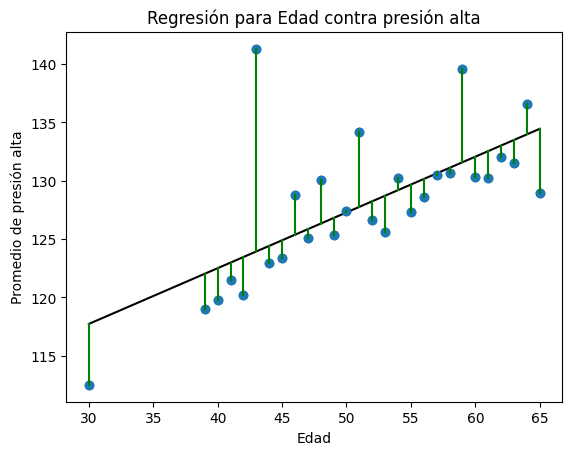

In [67]:
# Presión alta
xfit = np.linspace(Age.min(),Age.max(),Age.size)
yfit = modelHP.predict(xfit[:, np.newaxis])

plt.scatter(Age, AvgHighP)
plt.plot(xfit, yfit, color="black")
plt.plot(Age, AvgHighP, 'o')

plt.plot(np.vstack([Age,Age]), np.vstack([AvgHighP, modelHP.predict(Age[:, np.newaxis])]), color="green")
plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta')
plt.title('Regresión para Edad contra presión alta')

Text(0.5, 1.0, 'Regresión para Edad contra presión baja')

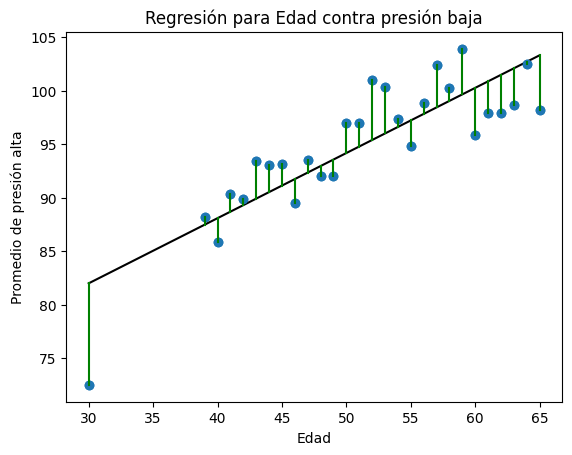

In [68]:
# Presión baja
xfit = np.linspace(Age.min(),Age.max(),Age.size)
yfit = modelLP.predict(xfit[:, np.newaxis])

plt.scatter(Age, AvgLowP)
plt.plot(xfit, yfit, color="black")
plt.plot(Age, AvgLowP, 'o')

plt.plot(np.vstack([Age,Age]), np.vstack([AvgLowP, modelLP.predict(Age[:, np.newaxis])]), color="green")
plt.xlabel('Edad')
plt.ylabel('Promedio de presión alta')
plt.title('Regresión para Edad contra presión baja')

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [80]:
def pressure_low(age):
  return modelLP.predict(np.array([[age]]))[0]

query_age= 76
pressure_low(query_age)

110.00876081923334

In [81]:
def pressure_high(age):
  return modelHP.predict(np.array([[age]]))[0]

query_age= 76
pressure_high(query_age)

139.70194835946515